In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Data Understanding & Visualization

In [45]:
data = pd.read_csv("D:/try hard/Iris/Iris.csv")

In [46]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [48]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [49]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

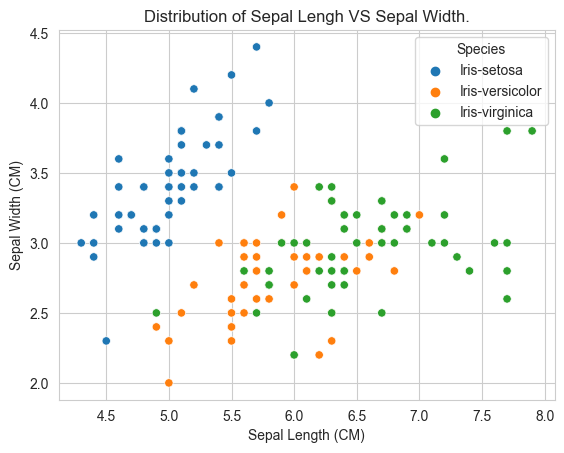

In [50]:
sns.scatterplot(data = data, x = "SepalLengthCm", y = "SepalWidthCm", hue = "Species")
plt.title("Distribution of Sepal Lengh VS Sepal Width.")
plt.xlabel("Sepal Length (CM)")
plt.ylabel("Sepal Width (CM)")
plt.show()

# Split Train & Test

In [51]:
x = data.drop("Species", axis=1)
y = data["Species"]

In [52]:
# Label for "Species"
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [53]:
# make pipeline for scale data
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([("scaler", StandardScaler())])

In [54]:
from sklearn.compose import ColumnTransformer

num_attribs = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
cat_attribs = ["Species"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

In [56]:
x_train = preprocess_pipeline.fit_transform(x_train)
x_test = preprocess_pipeline.transform(x_test)

In [57]:
from sklearn.linear_model import LogisticRegression

# Using Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [58]:
y_train_pred = log_reg.predict(x_train)

In [59]:
y_train_pred

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

# Accuracy

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc = accuracy_score(y_train, y_train_pred)
pre = precision_score(y_train, y_train_pred, average='macro')
re = recall_score(y_train, y_train_pred, average='macro')
print(f"Accuracy: {acc}")
print(f"Precision: {pre}")
print(f"Recall: {re}")

Accuracy: 0.9666666666666667
Precision: 0.9670627475505524
Recall: 0.9670627475505524


# K-Nearest Neighbor & GridSearch

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.958 total time=   0.0s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=1.000 total time=   0.0s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.833 total time=   0.0s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=1.000 total time=   0.0s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.958 total time=   0.0s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.958 total time=   0.0s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=1.000 total time=   0.0s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.833 total time=   0.0s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=1.000 total time=   0.0s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.958 total time=   0.0s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.917 total time=   0.0s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [62]:
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'uniform'}

In [63]:
grid_search.best_score_

0.95

# Evaluating Classifiers

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [65]:
classifiers = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Support Vector", SVC()),
    ("K-Nearest Neighbor", KNeighborsClassifier())
]

In [66]:
results = pd.DataFrame(columns=["Classifier", "Accuracy", "Precision", "Recall", "F1-Score"])

In [67]:
results

,Classifier,Accuracy,Precision,Recall,F1-Score


In [79]:
import pandas as pd
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []  # Create an empty list to store the results

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)
    for name, classifier in classifiers:
        classifier.fit(x_train, y_train)
        y_train_pred = classifier.predict(x_train)
        metrics = {
            "Classifier": name,
            "Accuracy": accuracy_score(y_train, y_train_pred),
            "Precision": precision_score(y_train, y_train_pred, average="macro"),
            "Recall": recall_score(y_train, y_train_pred, average="macro"),
            "F1-Score": f1_score(y_train, y_train_pred, average="macro")
        }

        results.append(metrics)

results_df = pd.DataFrame(results)  # Convert the list of dictionaries to a DataFrame

# Now the appended rows are stored in the 'results_df' DataFrame

In [80]:
results_df

,Classifier,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.966667,0.967063,0.967063,0.966667
1,Decision Tree,1.000000,1.000000,1.000000,1.000000
2,Random Forest,1.000000,1.000000,1.000000,1.000000
3,Support Vector,0.966667,0.967063,0.967063,0.966667
4,K-Nearest Neighbor,0.958333,0.958647,0.958099,0.958275


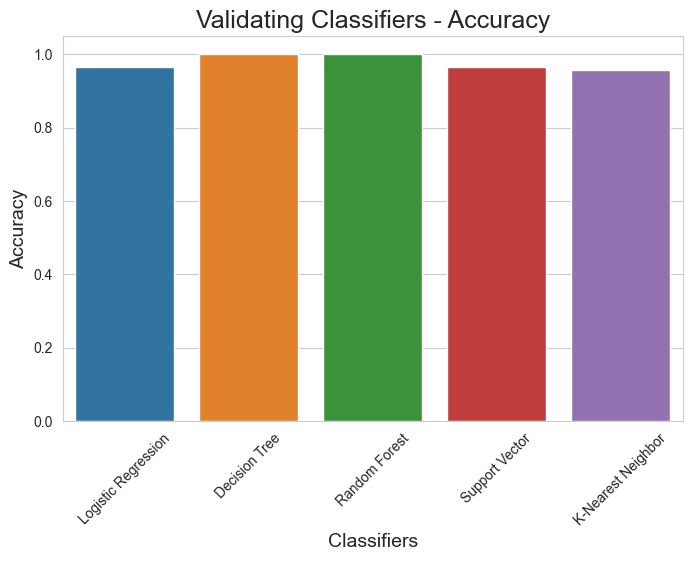

In [82]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="Classifier", y="Accuracy", data=results_df)
ax.set_title("Validating Classifiers - Accuracy", fontsize = 18)
ax.set_xlabel("Classifiers", fontsize = 14)
ax.set_ylabel("Accuracy", fontsize = 14)
plt.xticks(rotation=45)
plt.show()